## Rossmann Pharmaceuticals Store Sales Analysis 

### Exploration of customer purchasing behavior (Task-1)

In [1]:
# importing needed libraries 
import os
import sys
import numpy as np
import pandas as pd
import matplotlib
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()
import dvc.api
import category_encoders as ce

import warnings
warnings.filterwarnings('ignore')


In [2]:
pip install category_encoders

In [11]:
# Importing scripts & modules 
import sys
sys.path.append('E:\KAIM 2\KAIM 2 Week 4\Week4\scripts')
import helper

#sys.path.append(os.path.abspath(os.path.join('E:/MY/Trainings/Kifiya AIM/Week-4/Week4/scripts')))

from helper import MyHelper
from cleaner import MyCleaner
from logger import App_Logger

import utility
import plots



In [12]:
# Initialize logging functionality
logger = App_Logger("EDA_Logs.log").get_app_logger()

In [13]:
# Load the datasets
train_PATH = "../data/train.csv"
test_PATH = "../data/test.csv"
store_PATH = "../data/store.csv"
sample_PATH = "../data/sample_submission.csv"

In [14]:
# the utility function 
Helper = MyHelper()

In [16]:
# use helper function to read csv data
df_train = Helper.read_csv(train_PATH)
df_test = Helper.read_csv(test_PATH)
df_store = Helper.read_csv(store_PATH)
df_sample = Helper.read_csv(sample_PATH)

>> file read as csv
>> file read as csv
>> file read as csv
>> file read as csv


In [18]:
# return the DVC Data in version from the repository
def get_data(tag, 
            path='E:\KAIM 2\KAIM 2 Week 4\Week4\data\train.csv', 
            repo ='E:\KAIM 2\KAIM 2 Week 4\Week4'
            ):
    rev = tag
    data_url = dvc.api.get_url(path=path, repo=repo, rev=rev)
    df = pd.read_csv(data_url)
    return df

### Data inspection

In [7]:
# 1. the train data
df_train

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [19]:
#Check missing values 
df_train.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

The df_train.isnull().sum() is used to check for missing values in a pandas DataFrame called df_train. The method isnull() creates a boolean mask of the same shape as the DataFrame, where True indicates a null value and False indicates a non-null value. The sum() function then counts the number of True values in each column. 

The output shows the count of null values for each column in the DataFrame. In this case, the output indicates that there are no missing values (all counts are 0) in any of the columns: Store, DayOfWeek, Date, Sales, Customers, Open, Promo, StateHoliday, and SchoolHoliday. This is a good sign for data quality, as it means the dataset is complete without any null entries that might require handling or imputation before further analysis or modeling.

In [20]:
# 2. the test data 
df_test

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


In [21]:
#Checking missing values 
df_test.isnull().sum()

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

The df_test.isnull().sum() is used to check for missing values in another DataFrame called df_test, likely representing a test dataset. The output shows the count of null values for each column in this DataFrame. Unlike the previous example with df_train, this output reveals that there are 11 missing values in the 'Open' column of df_test. All other columns (Id, Store, DayOfWeek, Date, Promo, StateHoliday, and SchoolHoliday) have no missing values. 

This information is crucial for data preprocessing, as it highlights that the 'Open' column in the test dataset may require special handling, such as imputation or exclusion, depending on the specific requirements of the analysis or modeling task. The presence of missing values in the test set, but not in the training set, also suggests that the data collection or preparation process might have been different between the two datasets, which could be worth investigating further.

In [25]:
# 3. the store data
df_store

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [26]:
#Checking missing values 
df_store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

The df_store.isnull().sum() checks for missing values in a DataFrame called df_store, likely containing store-specific information. The output reveals a significant number of missing values across several columns. While Store, StoreType, Assortment, and Promo2 have no missing values, other columns show varying degrees of incompleteness. CompetitionDistance has 3 missing values, which is relatively minor. 

However, CompetitionOpenSinceMonth and CompetitionOpenSinceYear both have 354 missing values, indicating a substantial lack of information about when competitors opened nearby. More critically, Promo2SinceWeek, Promo2SinceYear, and PromoInterval all have 544 missing values each, suggesting that information about secondary promotions is missing for a large number of stores. 

This level of missing data presents a significant challenge for data analysis and modeling, potentially requiring sophisticated imputation techniques, feature engineering, or careful consideration of how to handle these missing values without introducing bias or losing too much information.

In [28]:
# 4. the sample_submission data
df_sample.head()

,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [32]:
# Merge train data and store data because both datasets have common column 'store'
 
## We use that column to merge store into train dataset

train = pd.read_csv('E:/KAIM 2/KAIM 2 Week 4/Week4/data/train.csv',  parse_dates=[2],index_col = 'Date')
store = pd.read_csv("E:/KAIM 2/KAIM 2 Week 4/Week4/data/store.csv", low_memory = False)

#  'train' dataFrame based on the date index
train['Year'] = train.index.year
train['Month'] = train.index.month
train['Day'] = train.index.day

train['WeekOfYear'] = train.index.isocalendar().week
train['Dates']=train.apply(lambda x:'%s-%s-%s' % (x['Year'],x['Month'],x['Day']),axis=1)
train['Dates']=pd.to_datetime(train['Dates'])

train_store = pd.merge(train, store, how = 'inner', on = 'Store')


train = pd.read_csv('E:/KAIM 2/KAIM 2 Week 4/Week4/data/train.csv',  parse_dates=[2],index_col = 'Date')
store = pd.read_csv("E:/KAIM 2/KAIM 2 Week 4/Week4/data/store.csv", low_memory = False)

train_store

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,Dates,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,5263,555,1,1,0,1,2015,7,...,2015-07-31,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,6064,625,1,1,0,1,2015,7,...,2015-07-31,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,8314,821,1,1,0,1,2015,7,...,2015-07-31,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,13995,1498,1,1,0,1,2015,7,...,2015-07-31,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,4822,559,1,1,0,1,2015,7,...,2015-07-31,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,0,0,0,0,a,1,2013,1,...,2013-01-01,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,0,0,0,0,a,1,2013,1,...,2013-01-01,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,0,0,0,0,a,1,2013,1,...,2013-01-01,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,0,0,0,0,a,1,2013,1,...,2013-01-01,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


### Data wrangling 

Data wrangling in this context involves several key steps to prepare the datasets (df_train, df_test, and df_store) for analysis. This process includes handling missing values, particularly in the df_test and df_store DataFrames, where some columns have significant gaps. Feature engineering is a crucial aspect, focusing on extracting useful information from the date column, such as creating 'Year', 'Month', 'Day', and 'WeekOfYear' features, with care taken to use the correct method for 'WeekOfYear' in newer pandas versions. Encoding categorical variables, scaling numerical features, and addressing potential outliers in sales and customer data are important tasks. Merging the datasets, selecting relevant features, and ensuring appropriate data types for each column are also essential. 

Additionally, creating lag features for time series analysis and handling special cases like closed stores may be necessary. Throughout this process, it's important to document decisions and maintain data integrity while preparing a clean, consistent dataset for subsequent analysis or modeling.

In [33]:
#Check the missing values
train_store.isnull().sum()

Store                             0
DayOfWeek                         0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
Year                              0
Month                             0
Day                               0
WeekOfYear                        0
Dates                             0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

The above checks for missing values in the 'train_store' DataFrame, likely a merged dataset combining training and store information. The output reveals a mixed picture of data completeness. Core store and sales data (Store, DayOfWeek, Sales, Customers, Open, Promo, StateHoliday, SchoolHoliday) along with newly engineered time-based features (Year, Month, Day, WeekOfYear, Dates) and basic store characteristics (StoreType, Assortment) have no missing values, indicating a solid foundation for analysis. However, competition and promotion-related features show significant gaps: CompetitionDistance has 2,642 missing values, while CompetitionOpenSinceMonth and CompetitionOpenSinceYear both lack 323,348 entries.

 Most notably, Promo2-related columns (Promo2SinceWeek, Promo2SinceYear, PromoInterval) are missing 508,031 values each, suggesting a substantial portion of the dataset lacks information on secondary promotions. This pattern of missing data highlights the need for careful consideration in handling these features during analysis and modeling, potentially requiring imputation strategies or the creation of "missing" categories to maintain the integrity and predictive power of any models using these variables.

In [34]:
train_store[pd.isnull(train_store.CompetitionDistance)].head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,Dates,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,5,10052,973,1,1,0,1,2015,7,...,2015-07-31,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,5,6306,540,1,1,0,1,2015,7,...,2015-07-31,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,5,6000,466,1,1,0,0,2015,7,...,2015-07-31,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"
1405,291,4,9030,883,1,1,0,1,2015,7,...,2015-07-30,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
1736,622,4,5412,406,1,1,0,1,2015,7,...,2015-07-30,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN


In [35]:
df_store_check_distribution=train_store.drop(train_store[pd.isnull(train_store.CompetitionDistance)].index)
df_store_check_distribution.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,Dates,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,5263,555,1,1,0,1,2015,7,...,2015-07-31,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,6064,625,1,1,0,1,2015,7,...,2015-07-31,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,8314,821,1,1,0,1,2015,7,...,2015-07-31,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,13995,1498,1,1,0,1,2015,7,...,2015-07-31,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,4822,559,1,1,0,1,2015,7,...,2015-07-31,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


{'Mean': 5430.085652302903,
 'Median': 2330.0,
 'Standard Dev': 7715.3198979951185}

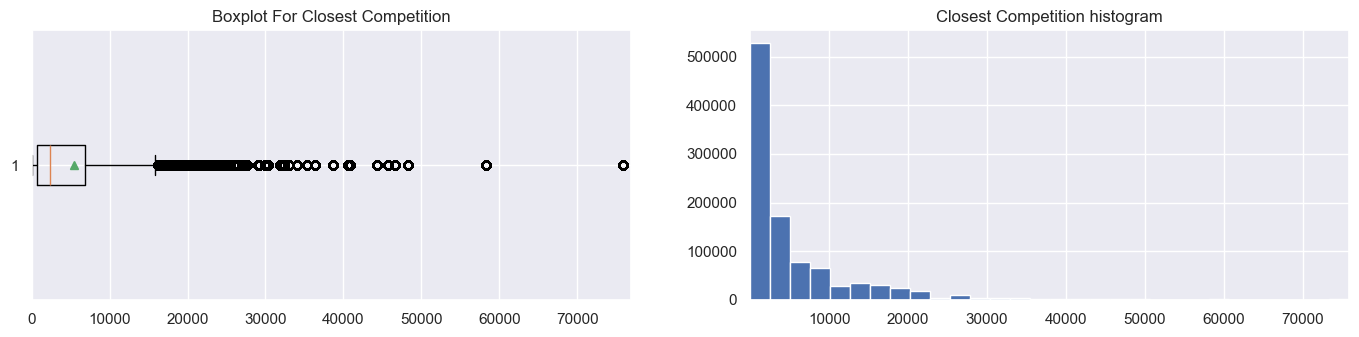

In [36]:
# * Let's take at the following metrics
df_store_check_distribution=train_store.drop(train_store[pd.isnull(train_store.CompetitionDistance)].index)
fig, axes = plt.subplots(1, 2, figsize=(17,3.5))
axes[0].boxplot(df_store_check_distribution.CompetitionDistance, showmeans=True,vert=False,)
axes[0].set_xlim(0,max(df_store_check_distribution.CompetitionDistance+1000))
axes[0].set_title('Boxplot For Closest Competition')
axes[1].hist(df_store_check_distribution.CompetitionDistance, cumulative=False, bins=30)
axes[1].set_title("Closest Competition histogram")
axes[1].set_xlim((min(df_store_check_distribution.CompetitionDistance), max(df_store_check_distribution.CompetitionDistance)))
{"Mean":np.nanmean(train_store.CompetitionDistance),"Median":np.nanmedian(train_store.CompetitionDistance),"Standard Dev":np.nanstd(train_store.CompetitionDistance)}
#That's what i thought, very different values, let's see why 

In the above code, the goal is to analyze the distribution of the CompetitionDistance variable from the train_store DataFrame, specifically focusing on stores that have a valid competition distance (i.e., excluding null values). The first line creates a new DataFrame, df_store_check_distribution, by dropping any rows from train_store where CompetitionDistance is null. 

Then, two plots are generated: a boxplot and a histogram of the CompetitionDistance. The boxplot provides a visual summary of the distribution, showing outliers and the mean, while the histogram illustrates the frequency distribution of the competition distances across 30 bins. Lastly, the code computes and displays the mean, median, and standard deviation of the CompetitionDistance, revealing significant differences: a mean of approximately 5430.09, a median of 2330.0, and a standard deviation of about 7715.32. 

These statistics indicate a right-skewed distribution, where the mean is heavily influenced by a few stores with extremely high competition distances, while the median represents a more typical value.

In [37]:
train_store['CompetitionDistance'].fillna(train_store['CompetitionDistance'].median(), inplace = True)

In [39]:
# in the CompetitionOpenSinceMonth and CompetitionOpenSinceYear columns Since we have no information whatsoever on
# those missing values and no accurate way of filling those values. let us assign these fields 0 
train_store.CompetitionOpenSinceMonth.fillna(0, inplace = True)
train_store.CompetitionOpenSinceYear.fillna(0,inplace=True)

__Promo2SinceWeek, Promo2SinceYear and PromoInterval__ 

This case is pretty straighforward, all the missing values comes from fields where Promo2=0 which means there are no continuous promotional activities for those stores.
Having no promotion means those fields have to be 0 as well since they are linked to Promo2.


In [40]:
train_store.Promo2SinceWeek.fillna(0,inplace=True)
train_store.Promo2SinceYear.fillna(0,inplace=True)
train_store.PromoInterval.fillna(0,inplace=True)


In [43]:
# let us see waht about the StateHoliday column

train_store.StateHoliday.fillna(0,inplace=True)

In [44]:
utility.percent_missing(train_store)

The dataset contains 0.0 % missing values.


The above code utility.percent_missing(train_store) is likely a function call that checks the train_store dataset for any missing values and calculates the percentage of those missing values. In this case, the output indicates that the dataset contains 0.0% missing values, meaning that there are no missing entries in the dataset, which is ideal for ensuring data integrity and reliability in analyses or model training.

In [46]:
# return the description of the combined train_store data
train_store.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Year,Month,Day,WeekOfYear,Dates,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1017209.0,1017209,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,2.013832e+03,5.846762e+00,1.570279e+01,23.615515,2014-04-11 01:30:42.846061824,5.422034e+03,4.926878e+00,1.370173e+03,5.005638e-01,1.164767e+01,1.007011e+03
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.013000e+03,1.000000e+00,1.000000e+00,1.0,2013-01-01 00:00:00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.013000e+03,3.000000e+00,8.000000e+00,11.0,2013-08-17 00:00:00,7.100000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.014000e+03,6.000000e+00,1.600000e+01,22.0,2014-04-02 00:00:00,2.330000e+03,4.000000e+00,2.006000e+03,1.000000e+00,1.000000e+00,2.009000e+03
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,2.014000e+03,8.000000e+00,2.300000e+01,35.0,2014-12-12 00:00:00,6.880000e+03,9.000000e+00,2.011000e+03,1.000000e+00,2.200000e+01,2.012000e+03
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,2.015000e+03,1.200000e+01,3.100000e+01,52.0,2015-07-31 00:00:00,7.586000e+04,1.200000e+01,2.015000e+03,1.000000e+00,5.000000e+01,2.015000e+03
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.773960e-01,3.326097e+00,8.787638e+00,14.433381,NaN,7.706913e+03,4.283543e+00,9.353634e+02,4.999999e-01,1.532393e+01,1.005877e+03


### Reading the description report 

#### Sales

The __minimum sale__ is 0

The __maximum sale__ is 41551.00

25% of sale is below 3727.000

50% of sale is below 5744.000

75% of sale is below 7856.000

### Customers

The __minimum customer__ is 0

The __maximum customer__ is 7388

25% of customer is below 405

50% of customer is below 609

75% of customer is below 837

In [47]:
cleaned_df = train_store.copy()

### let us use the probability distribution function (PDF) for sales distribution 
A essential step in the data exploration is to display the probability distribution function (PDF) of a variable. The PDF will show us how that variable is distributed which makes it very easy to spot anomalies, such as outliers.
It is often the basis on which we decide whether we want to transform a feature

Text(0.5, 1.0, 'Sales Distribution')

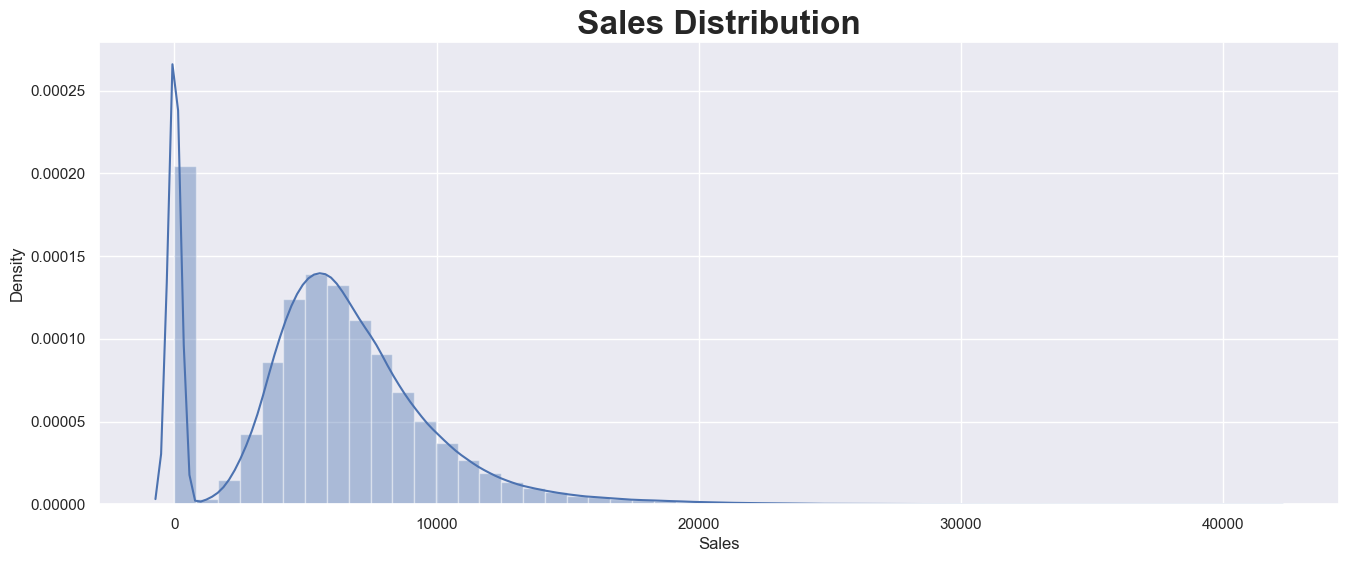

In [48]:
plt.figure(figsize=(16, 6))
sns.distplot(cleaned_df['Sales']).set_title('Sales Distribution',fontdict= { 'fontsize': 24, 'fontweight':'bold'})

This visualization of the sales distribution using the Seaborn library in Python sets up a matplotlib figure with a size of 16x6 inches. Then, it uses Seaborn's distplot function to create a histogram with a kernel density estimate (KDE) overlay of the 'Sales' column from the cleaned_df DataFrame. 

The plot's title is set to "Sales Distribution" with a large, bold font. The resulting graph provides a visual representation of the sales data distribution, allowing for quick insights into the central tendency, spread, and shape of the sales figures.

The output of this code is the image you've shared. It shows a sales distribution graph with sales values on the x-axis ranging from 0 to about 40,000, and density on the y-axis. 

The distribution appears to be right-skewed, with a peak around 5,000-7,000 in sales. There's also a smaller, sharp peak near 0, suggesting a significant number of very low or zero sales occurrences. The graph uses a blue color scheme and includes both a histogram and a smoothed density curve.

### let us use the probability distribution function (PDF) for customers distribution

Text(0.5, 1.0, 'Customers Distribution')

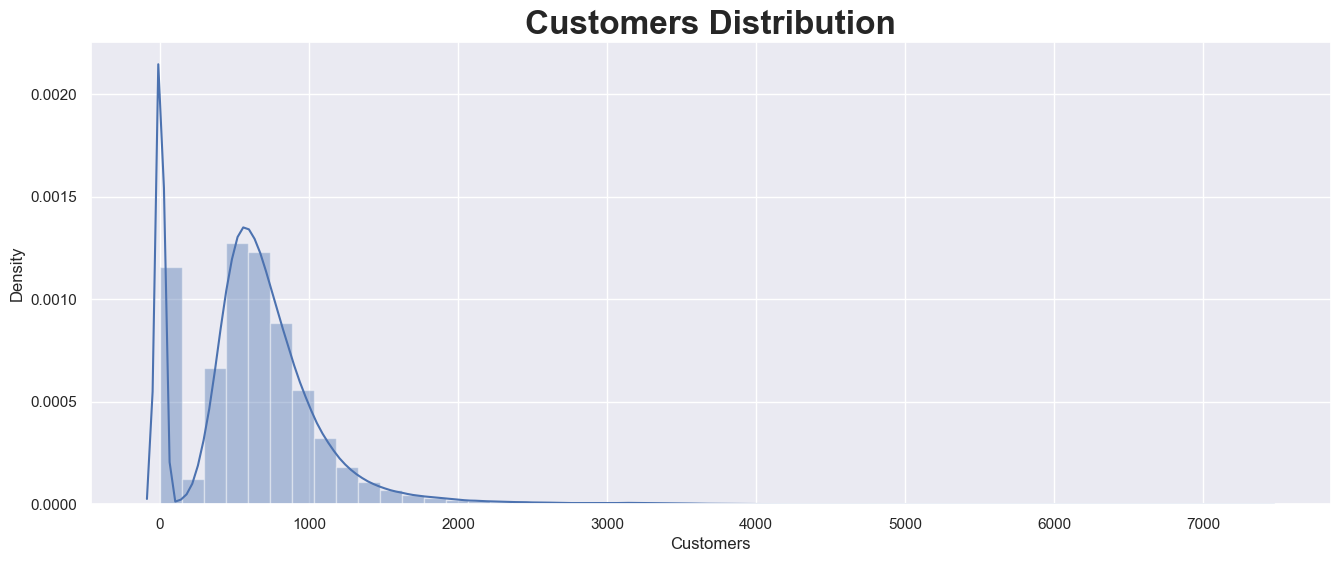

In [49]:
plt.figure(figsize=(16, 6))
sns.distplot(cleaned_df['Customers']).set_title('Customers Distribution',fontdict= { 'fontsize': 24, 'fontweight':'bold'})

This visualization of the customer distribution using Seaborn and Matplotlib libraries in Python sets up a figure with dimensions of 16x6 inches, then uses Seaborn's distplot function to plot a histogram with a kernel density estimate (KDE) of the 'Customers' column from the cleaned_df DataFrame.\

The plot is given a title "Customers Distribution" with large, bold font. This visualization allows for a quick analysis of the distribution of customer numbers, showing patterns in customer acquisition or retention.

The output is the image you've shared. It displays a right-skewed distribution of customers, with the x-axis representing the number of customers (ranging from 0 to about 7000) and the y-axis showing the density. There's a prominent peak near zero, suggesting many instances with very few customers. 

A second, broader peak occurs around 400-600 customers, indicating this as a common range. The distribution has a long tail extending to the right, implying some cases with very high customer numbers, though these are less frequent. The graph uses a blue color scheme for both the histogram bars and the smoothed density curve.



Here we can see that there are some outliers in sales and customers distribuiton

### visualization

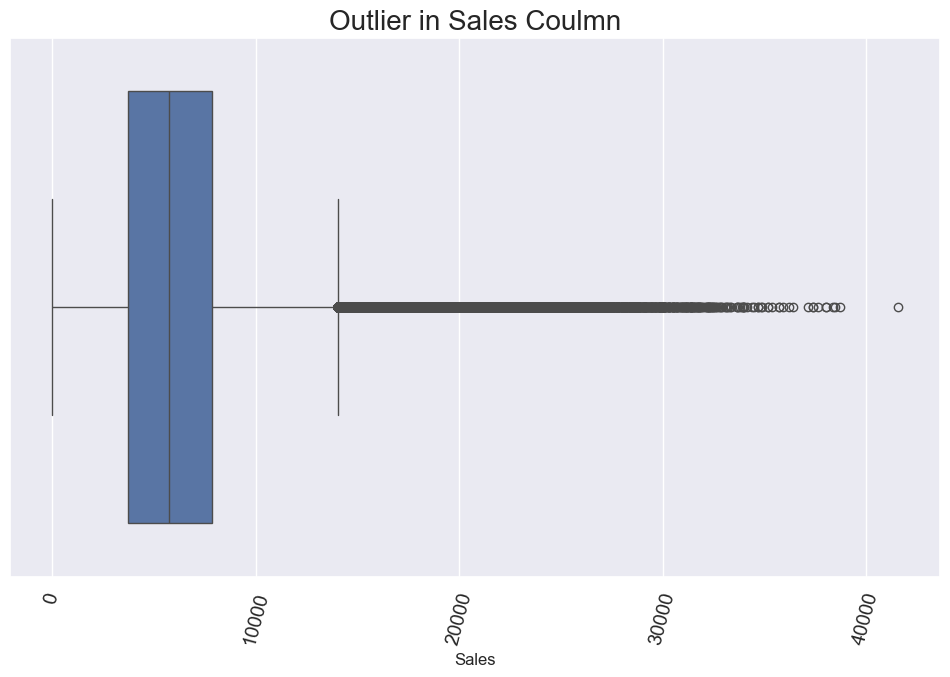

In [51]:
# let's visualize it with boxplot
plots.plot_box(cleaned_df, 'Sales','Outlier in Sales Coulmn')

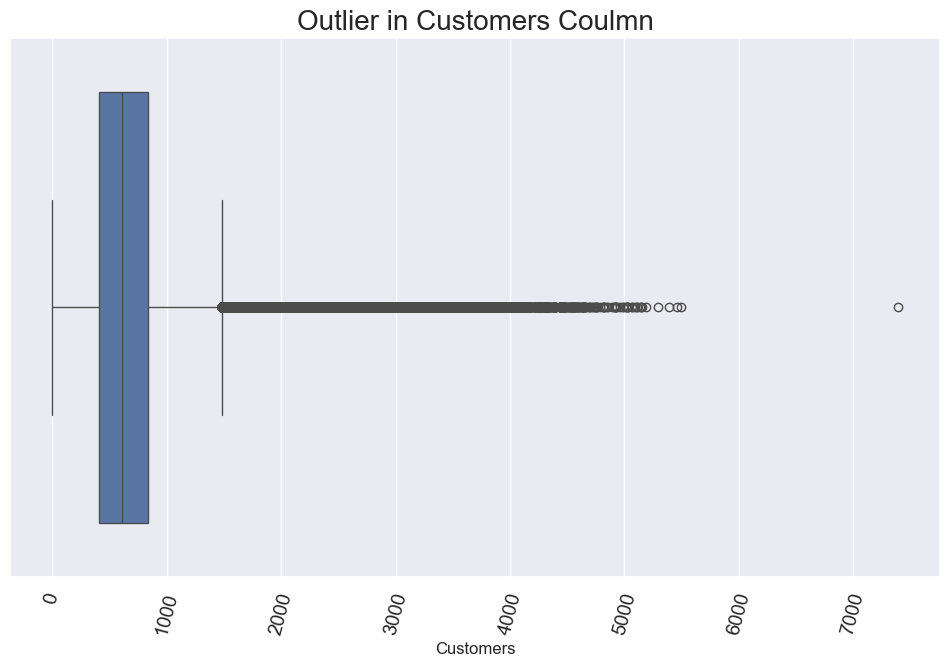

In [52]:
plots.plot_box(cleaned_df, 'Customers','Outlier in Customers Coulmn')

<Axes: xlabel='DayOfWeek', ylabel='Sales'>

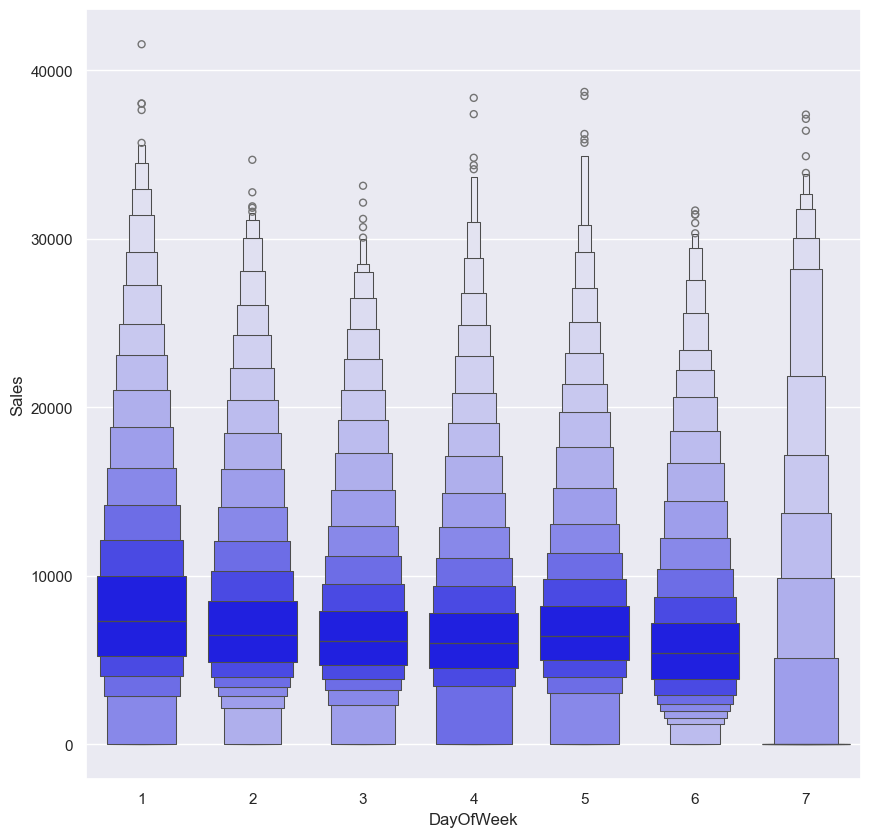

In [53]:
plt.figure(figsize=(10,10))
sns.boxenplot(data=cleaned_df,scale="linear",x="DayOfWeek",y="Sales",color="Blue")

<Axes: xlabel='DayOfWeek', ylabel='Customers'>

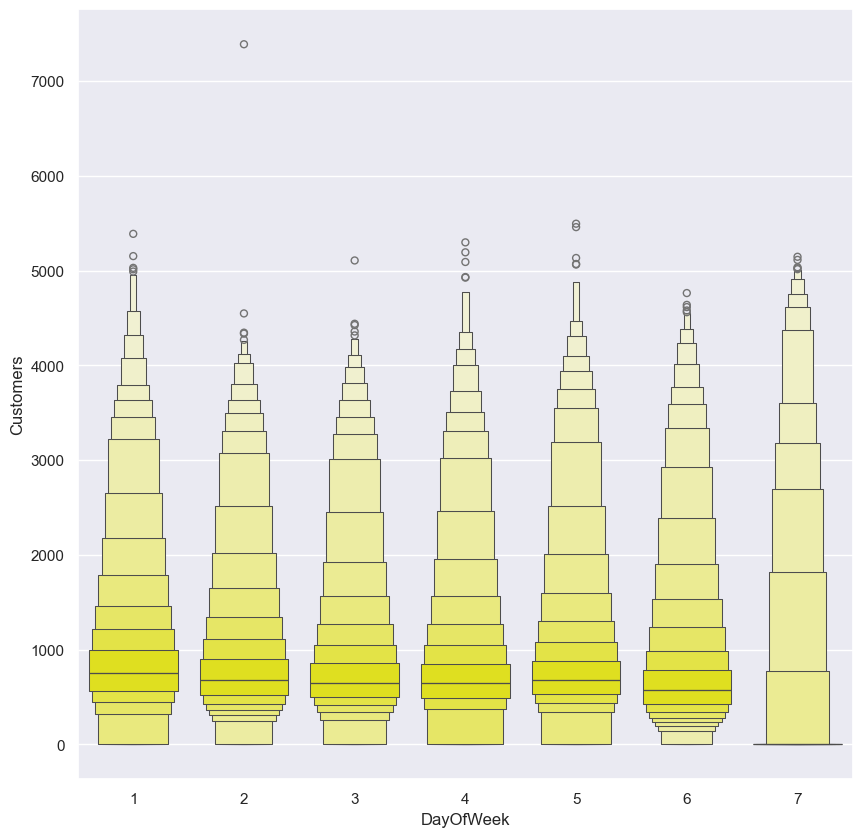

In [54]:
plt.figure(figsize=(10,10))
sns.boxenplot(y="Customers", x="DayOfWeek",data=cleaned_df, scale="linear",color="Yellow")

This data, contains many outliers, but these might have been caused to the surge of customers during a festival or Holiday, or due to an effective promo. Below we are handle the outliers

In [55]:
#Treating the outliers 
  # a function for replacing outliers with the median, used when there's too many outliers in a feature
def replace_outlier_with_median(dataFrame, feature):
    Q1 = dataFrame[feature].quantile(0.25)
    Q3 = dataFrame[feature].quantile(0.75)
    median = dataFrame[feature].quantile(0.50)

    IQR = Q3 - Q1

    upper_whisker = Q3 + (1.5 * IQR)
    lower_whisker = Q1 - (1.5 * IQR)

    dataFrame[feature] = np.where(dataFrame[feature] > upper_whisker, median, dataFrame[feature])
    dataFrame[feature] = np.where(dataFrame[feature] < lower_whisker, median, dataFrame[feature])

In [56]:
replace_outlier_with_median(cleaned_df, 'Sales')

In [57]:
replace_outlier_with_median(cleaned_df, 'Customers')

### Visualization on DayOfWeek, Open vs closed distributions

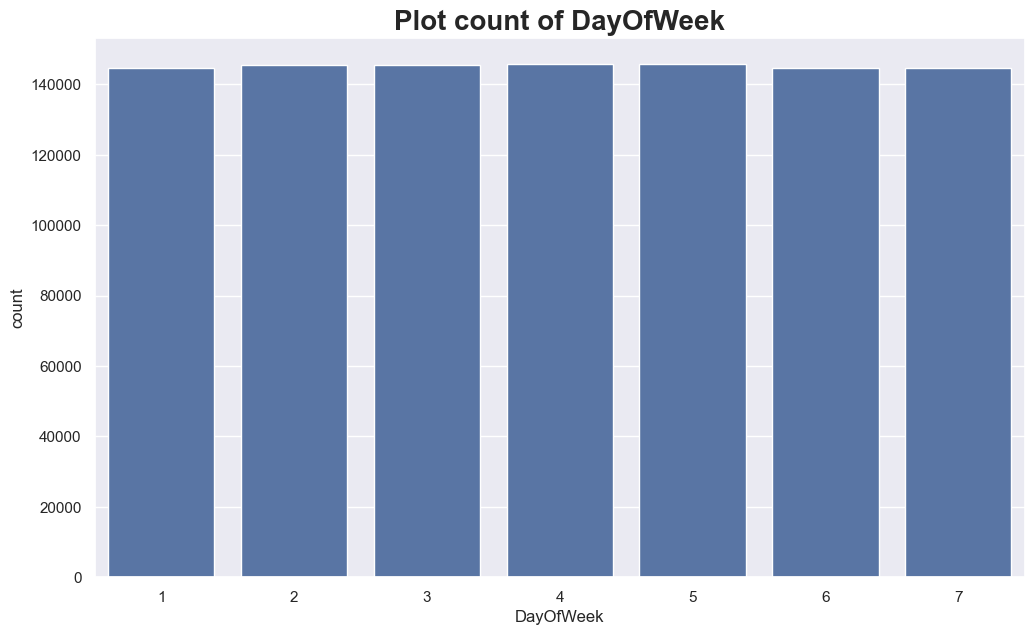

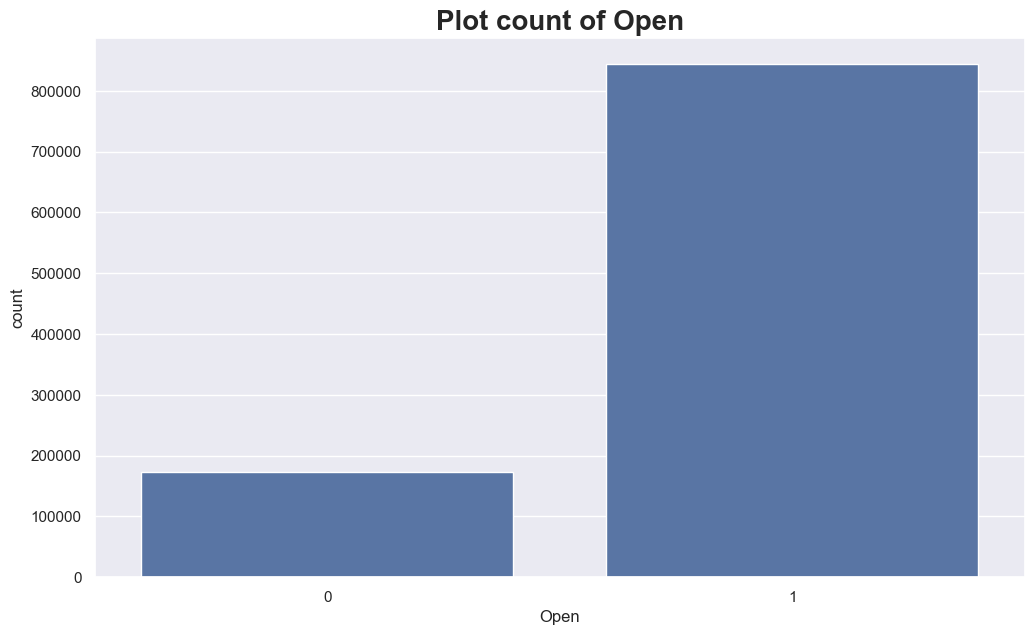

In [58]:
#ploting distribution using plot_count method
plots.plot_count(cleaned_df,'DayOfWeek')
plots.plot_count(cleaned_df, 'Open')

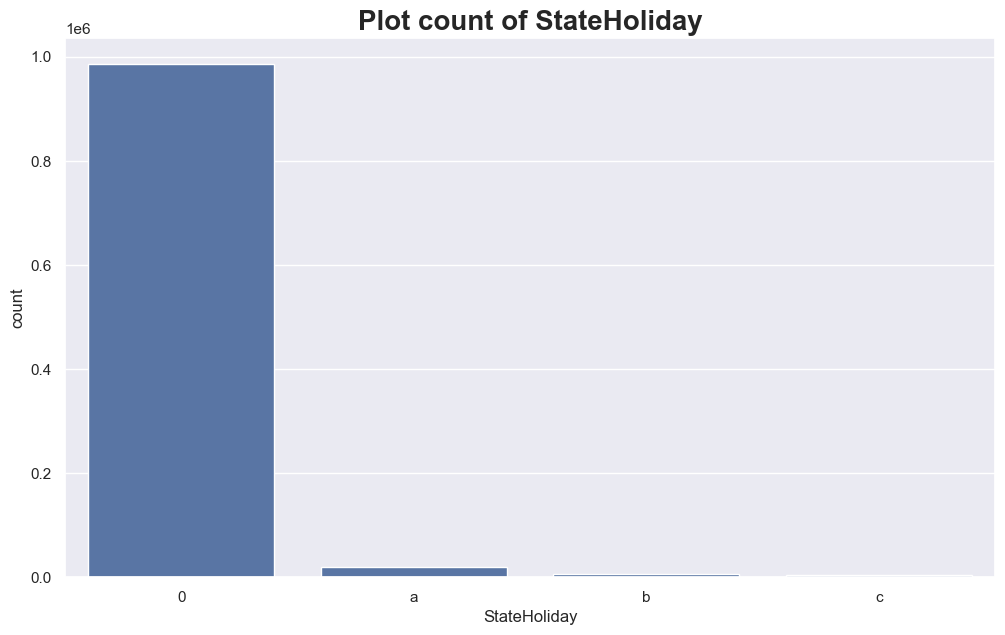

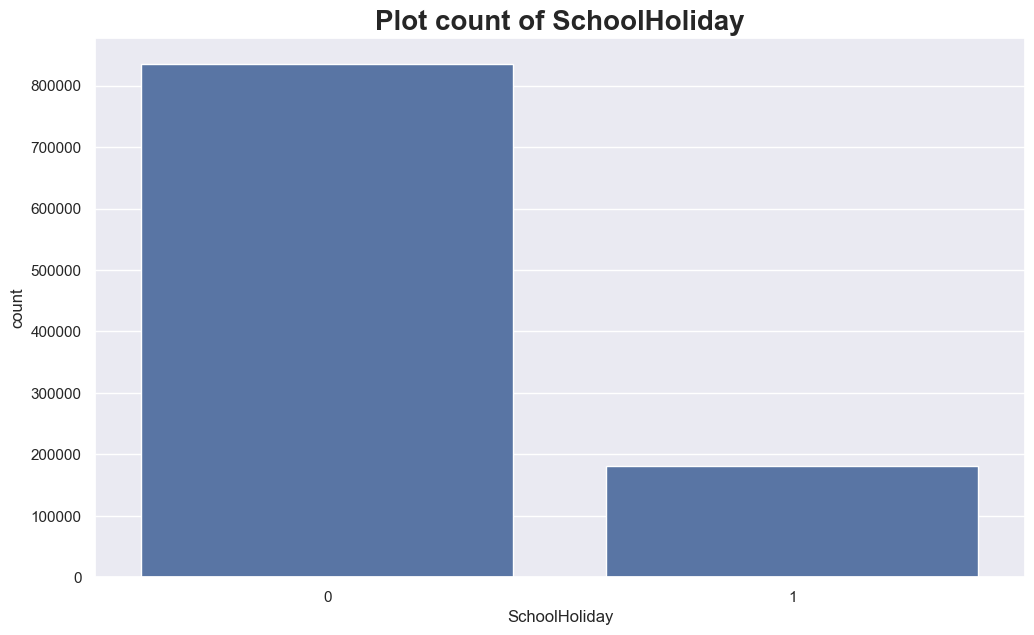

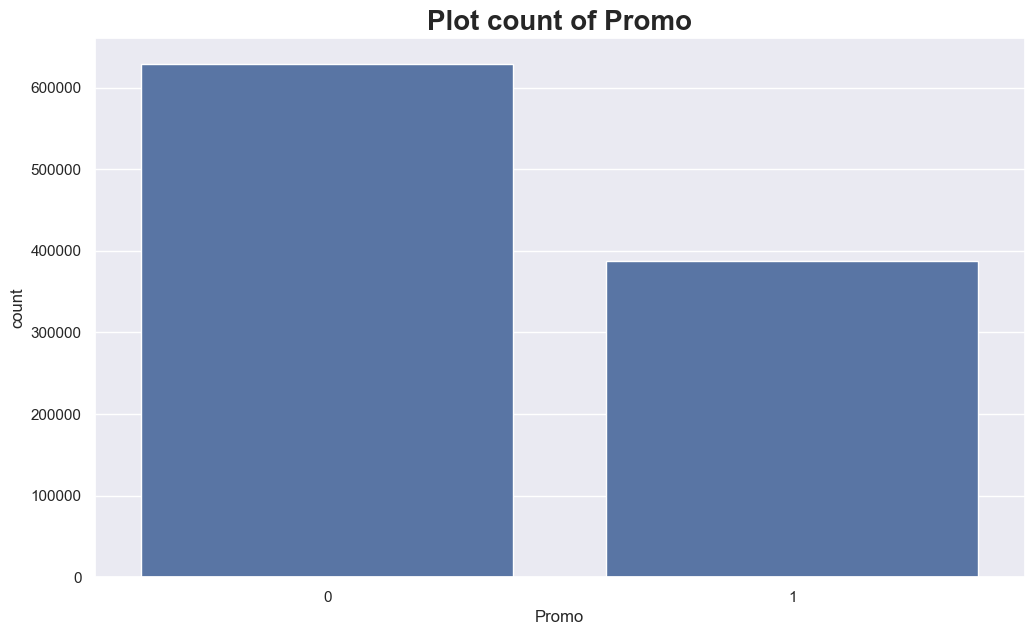

In [59]:
# visualizing the state Holiday School Holidays & Promo 
plots.plot_count(cleaned_df, 'StateHoliday')
plots.plot_count(cleaned_df, 'SchoolHoliday')
plots.plot_count(cleaned_df, 'Promo')

<Figure size 900x700 with 0 Axes>

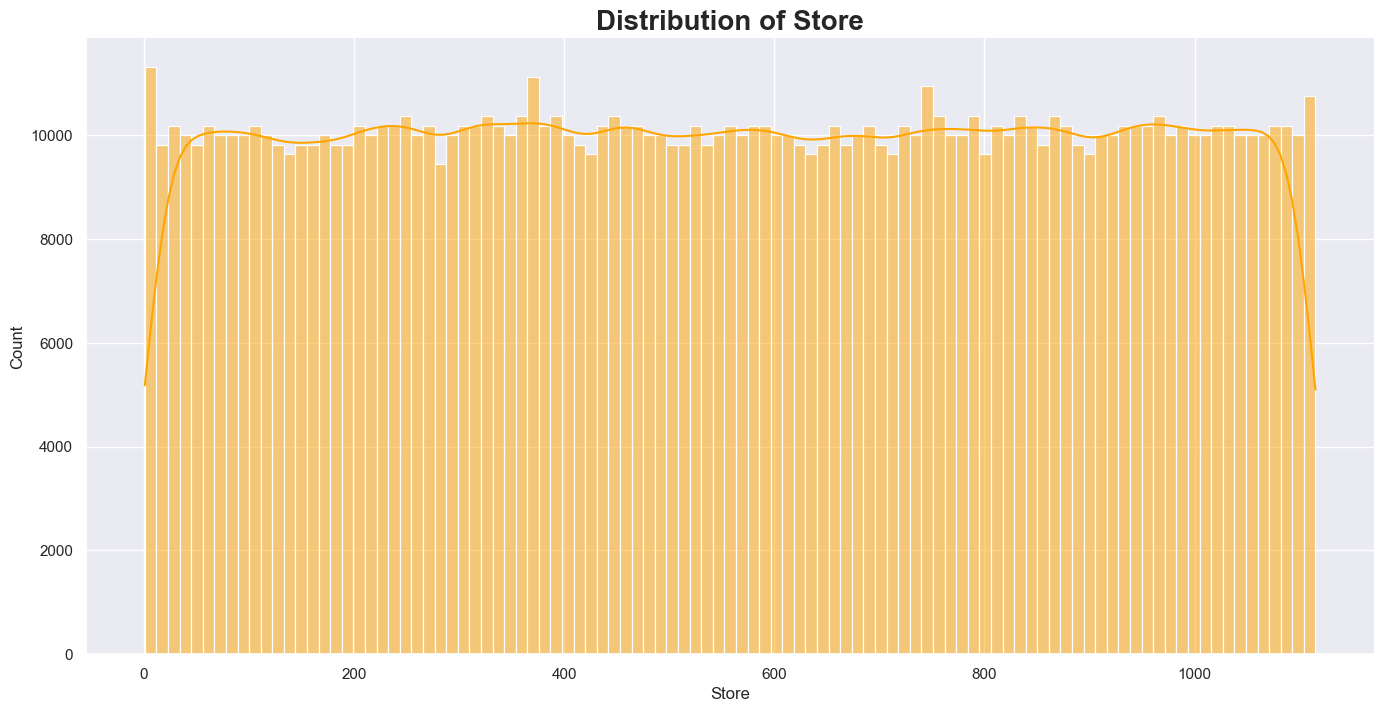

In [60]:
# visualizing the store distribution
plots.plot_hist(cleaned_df, 'Store', 'orange')

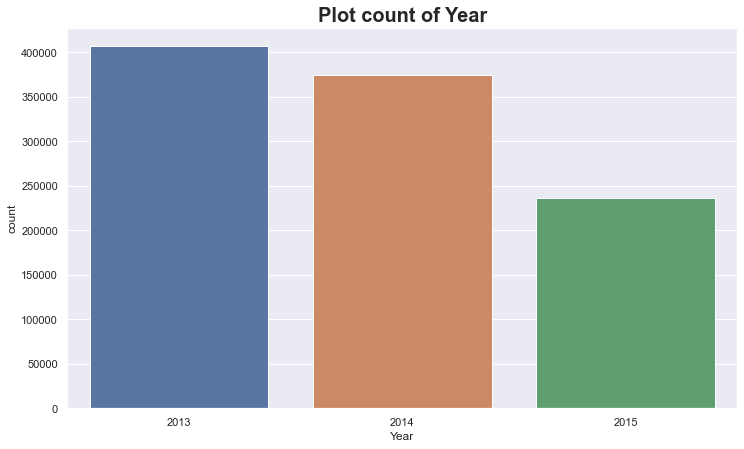

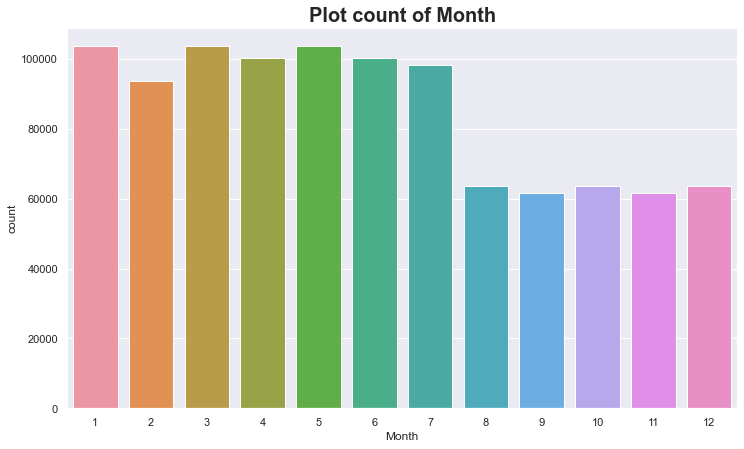

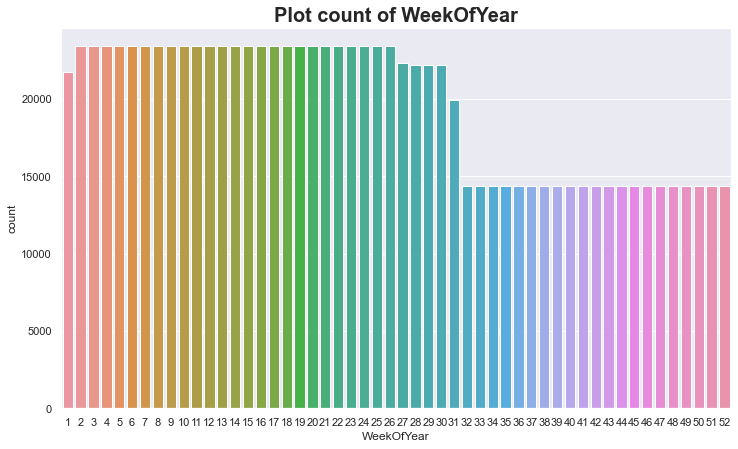

In [40]:
# visualing Year, Month & WeekOfYear distribution
plots.plot_count(cleaned_df, 'Year')
plots.plot_count(cleaned_df, 'Month')
plots.plot_count(cleaned_df, 'WeekOfYear')


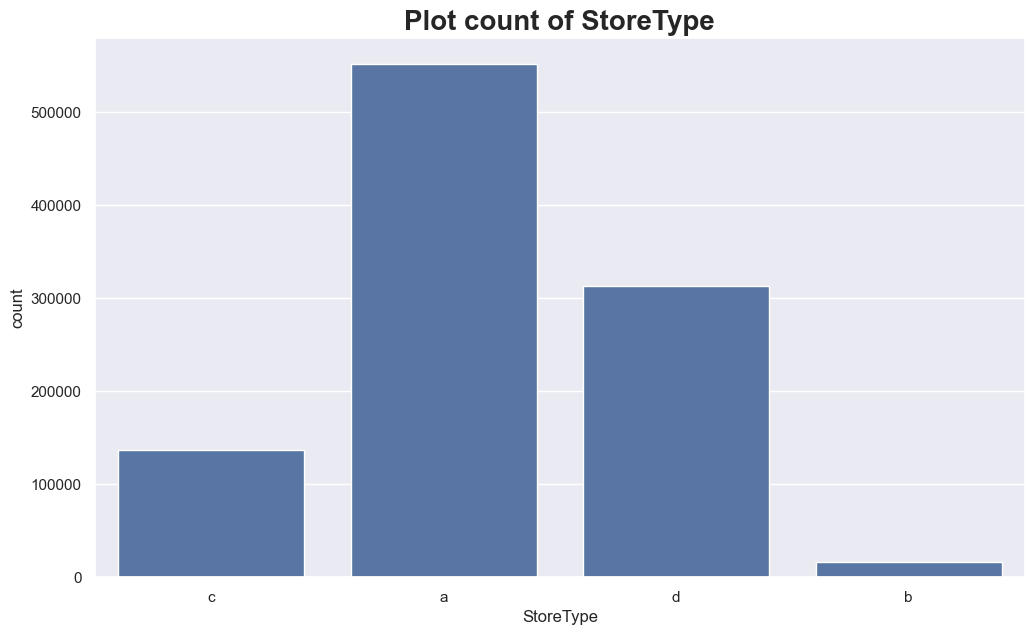

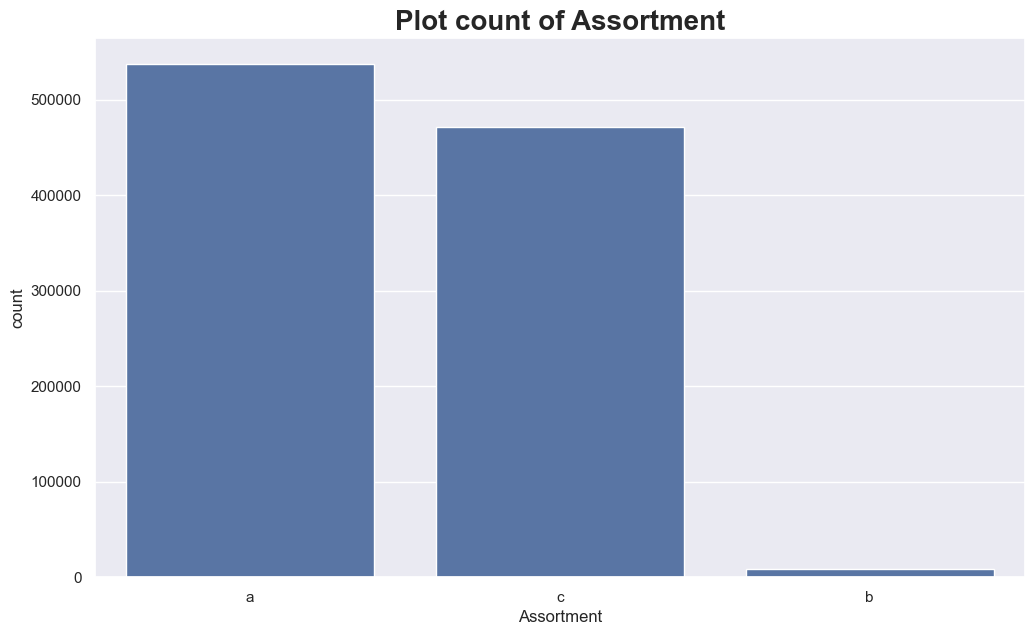

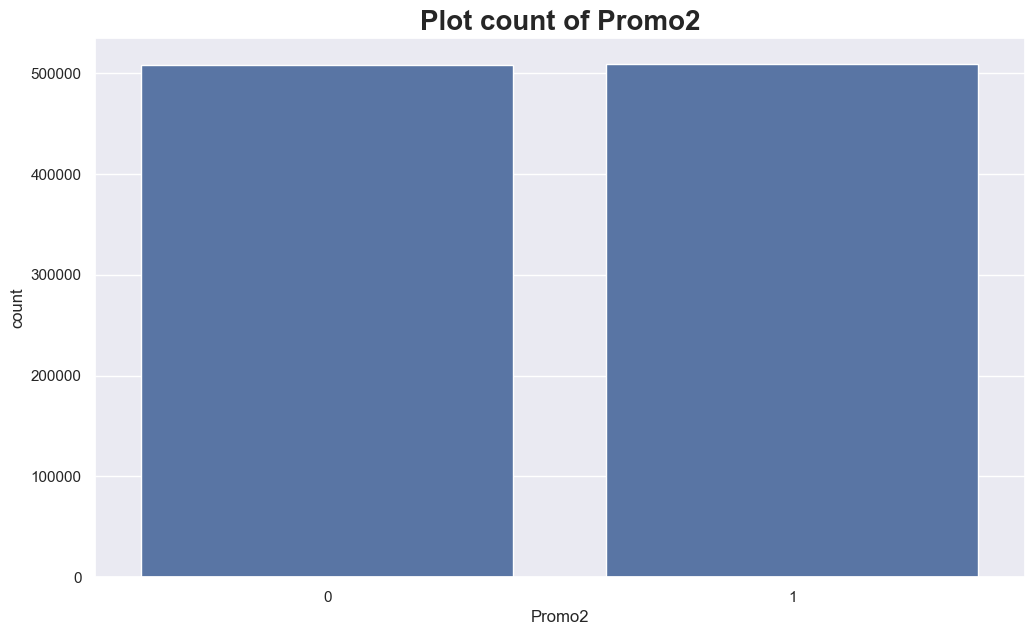

In [61]:
# visualing storeType, Assortment and Promo2 distribution
plots.plot_count(cleaned_df, 'StoreType')
plots.plot_count(cleaned_df, 'Assortment')
plots.plot_count(cleaned_df, 'Promo2')

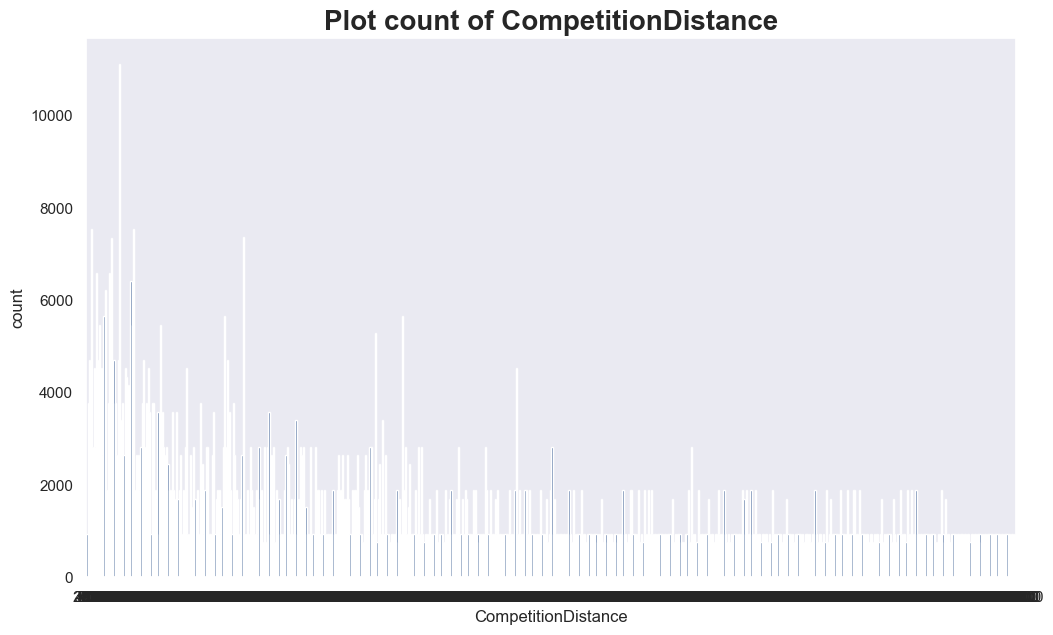

In [62]:
# visualing the CompetitionDistance
sns.set(style="dark")
plots.plot_count(cleaned_df, 'CompetitionDistance')


Text(0.5, 1.0, 'Customers Distribution')

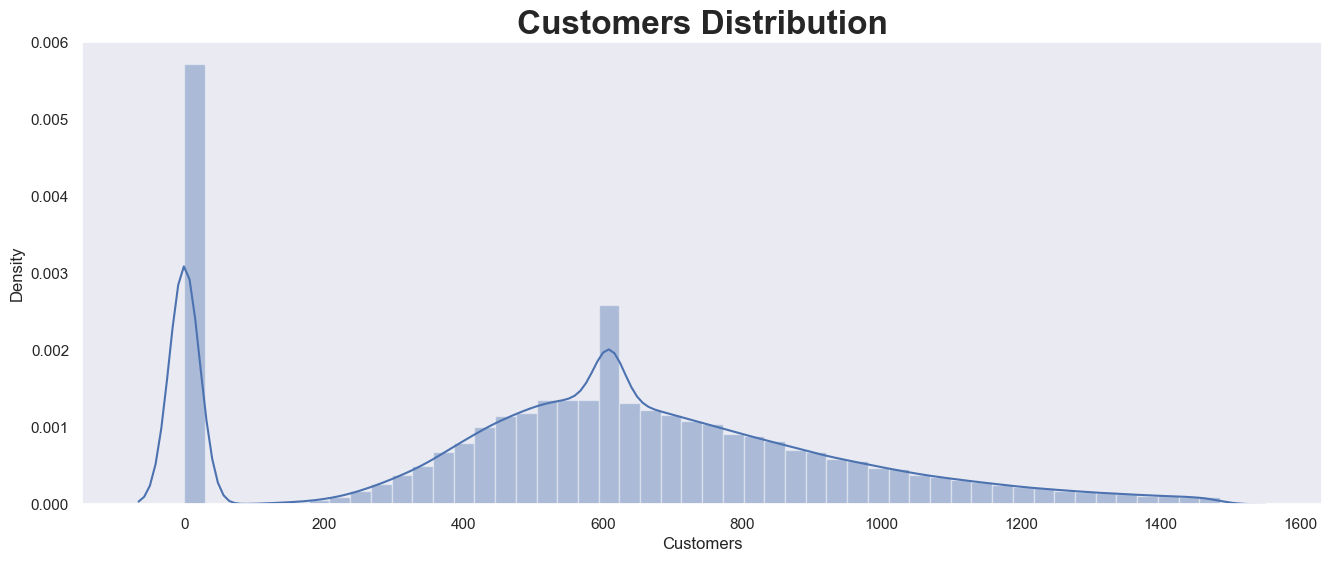

In [64]:
# visualing the Customers Distribution
plt.figure(figsize=(16, 6))
sns.distplot(cleaned_df['Customers']).set_title('Customers Distribution',fontdict= { 'fontsize': 24, 'fontweight':'bold'})

Text(0.5, 1.0, 'Sales Distribution')

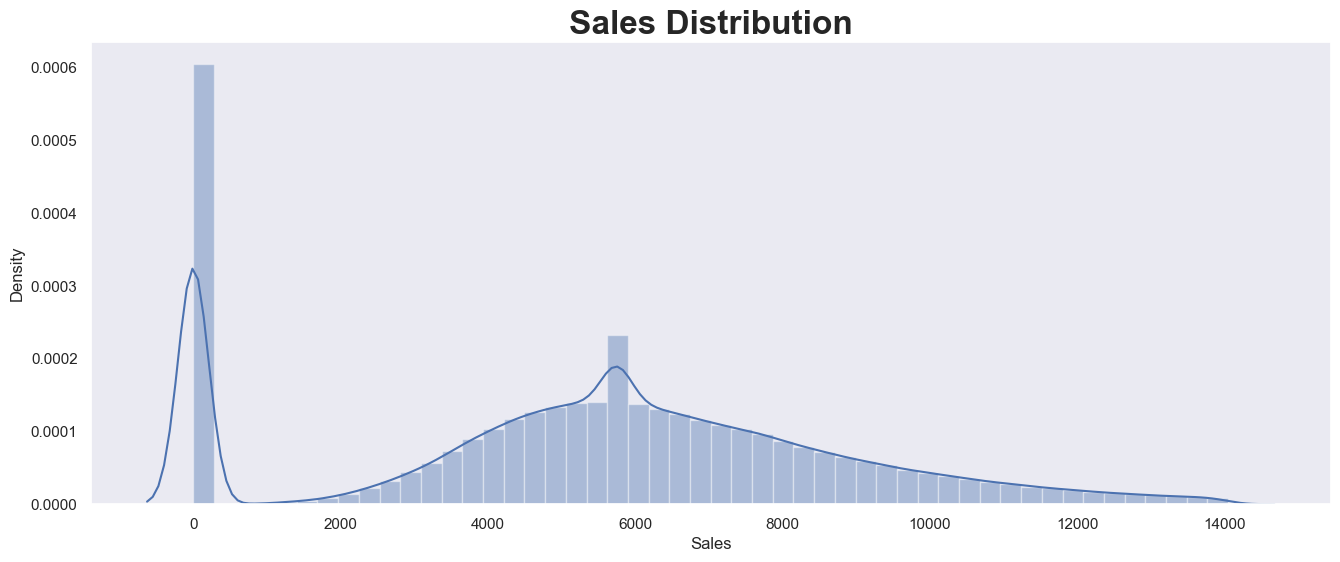

In [65]:
# visualizing the Sales Distribution
plt.figure(figsize=(16, 6))
sns.distplot(cleaned_df['Sales']).set_title('Sales Distribution',fontdict= { 'fontsize': 24, 'fontweight':'bold'})

__Feature Engeneering__

Feature engineering is the process of creating new variables or modifying existing ones in a dataset to improve machine learning model performance. It involves leveraging domain knowledge and data insights to extract more meaningful information from raw data. Common techniques include creating ratios (e.g., sales per customer), binning continuous variables into categories, applying mathematical transformations (like logarithms for skewed distributions), encoding categorical variables, generating interaction terms between features, and developing time-based features if applicable. 

The goal is to capture relevant patterns, reduce noise, and provide the model with more informative inputs. Effective feature engineering can significantly enhance a model's predictive power by highlighting underlying relationships in the data that may not be immediately apparent in the original features.

In [66]:
#Adding salespercustomer column
cleaned_df['SalesperCustomer']=cleaned_df['Sales']/cleaned_df['Customers']

In [67]:
cleaned_df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,SalesperCustomer
0,1,5,5263.0,555.0,1,1,0,1,2015,7,...,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,9.482883
1,2,5,6064.0,625.0,1,1,0,1,2015,7,...,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",9.702400
2,3,5,8314.0,821.0,1,1,0,1,2015,7,...,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",10.126675
3,4,5,13995.0,609.0,1,1,0,1,2015,7,...,c,c,620.0,9.0,2009.0,0,0.0,0.0,0,22.980296
4,5,5,4822.0,559.0,1,1,0,1,2015,7,...,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0,8.626118


In [70]:
# correlation Analysis
df_correlation=cleaned_df[['Store', 'DayOfWeek', 'Sales', 'Customers', 'Promo',
        'SchoolHoliday',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'SalesperCustomer', 'Month', 'Year',
       'StateHoliday', 'Assortment', 'StoreType',
       'PromoInterval']]


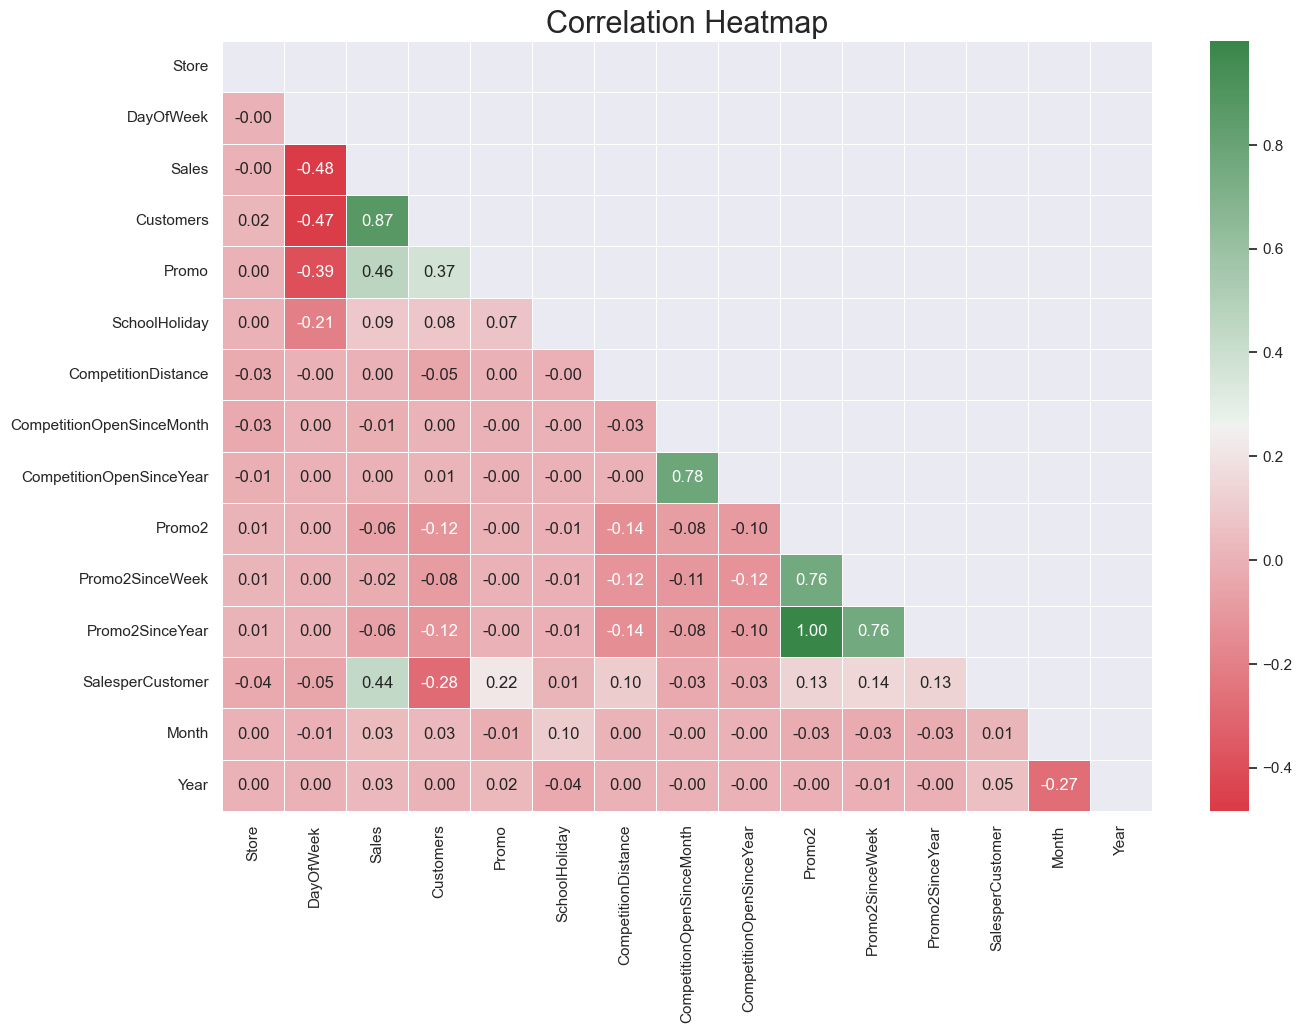

In [85]:
# Select only numeric columns
numeric_df = df_correlation.select_dtypes(include=[np.number])

# Calculate correlation matrix
correlation_matrix = numeric_df.corr()

# Create mask for upper triangle
upper_triangle = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Create heatmap
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(correlation_matrix, mask=upper_triangle,
            annot=True, fmt='.2f',
            linewidths=0.5,
            cmap=sns.diverging_palette(10, 133, as_cmap=True), ax=ax)

plt.title('Correlation Heatmap', fontsize=22)
plt.show()

This correlation heatmap for numeric variables in a dataset selects only numeric columns from the original DataFrame to avoid issues with non-numeric data. Then, it calculates the correlation matrix for these numeric columns. A mask for the upper triangle of the correlation matrix is created to avoid redundancy in the visualization. 

The code then uses Seaborn's heatmap function to visualize the correlations, with annotations showing the correlation values, a diverging color palette to highlight positive and negative correlations, and a title "Correlation Heatmap". The resulting plot provides a clear visual representation of the relationships between different variables in the dataset.

The output is the image provided, which shows a correlation heatmap. Key observations include: a strong positive correlation (0.87) between Sales and Customers; moderate positive correlation (0.46) between Sales and Promo; strong negative correlation (-0.48) between DayOfWeek and Sales; perfect correlation (1.00) between Promo2 and Promo2SinceYear; and several variables showing very weak or no correlation with others. 

The heatmap effectively illustrates the strength and direction of relationships between various features in the dataset, which is crucial for understanding data dynamics and can inform feature selection in predictive modeling.

In [83]:
cleaned_df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,SalesperCustomer
0,1,5,5263.0,555.0,1,1,0,1,2015,7,...,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,9.482883
1,2,5,6064.0,625.0,1,1,0,1,2015,7,...,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",9.702400
2,3,5,8314.0,821.0,1,1,0,1,2015,7,...,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",10.126675
3,4,5,13995.0,609.0,1,1,0,1,2015,7,...,c,c,620.0,9.0,2009.0,0,0.0,0.0,0,22.980296
4,5,5,4822.0,559.0,1,1,0,1,2015,7,...,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0,8.626118


-Since the competition variables CompetitionOpenSinceYear and CompeitionOpenSinceMonth have the same underlying meaning, merging them into one variable that we call CompetitionOpenSince makes easier for the algorithm to understand the pattern and creates less branches and thus complex trees.

In [86]:
cleaned_df['CompetitionOpenSince'] = np.where((cleaned_df['CompetitionOpenSinceMonth']==0) & 
                                                  (cleaned_df['CompetitionOpenSinceYear']==0) , 0,
                                                  (cleaned_df.Month - cleaned_df.CompetitionOpenSinceMonth) 
                                                  + (12 * (cleaned_df.Year - cleaned_df.CompetitionOpenSinceYear)) )

In [87]:
del cleaned_df['CompetitionOpenSinceYear']
del cleaned_df['CompetitionOpenSinceMonth']

In [89]:
cleaned_df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,Dates,StoreType,Assortment,CompetitionDistance,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,SalesperCustomer,CompetitionOpenSince
0,1,5,5263.0,555.0,1,1,0,1,2015,7,...,2015-07-31,c,a,1270.0,0,0.0,0.0,0,9.482883,82.0
1,2,5,6064.0,625.0,1,1,0,1,2015,7,...,2015-07-31,a,a,570.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",9.702400,92.0
2,3,5,8314.0,821.0,1,1,0,1,2015,7,...,2015-07-31,a,a,14130.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",10.126675,103.0
3,4,5,13995.0,609.0,1,1,0,1,2015,7,...,2015-07-31,c,c,620.0,0,0.0,0.0,0,22.980296,70.0
4,5,5,4822.0,559.0,1,1,0,1,2015,7,...,2015-07-31,a,a,29910.0,0,0.0,0.0,0,8.626118,3.0


In [94]:
Version_1 = "../data/train.csv"
Helper.save_csv(cleaned_df, Version_1)

>> File Successfully Saved.!!!


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,Dates,StoreType,Assortment,CompetitionDistance,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,SalesperCustomer,CompetitionOpenSince
0,1,5,5263.0,555.0,1,1,0,1,2015,7,...,2015-07-31,c,a,1270.0,0,0.0,0.0,0,9.482883,82.0
1,2,5,6064.0,625.0,1,1,0,1,2015,7,...,2015-07-31,a,a,570.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",9.702400,92.0
2,3,5,8314.0,821.0,1,1,0,1,2015,7,...,2015-07-31,a,a,14130.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",10.126675,103.0
3,4,5,13995.0,609.0,1,1,0,1,2015,7,...,2015-07-31,c,c,620.0,0,0.0,0.0,0,22.980296,70.0
4,5,5,4822.0,559.0,1,1,0,1,2015,7,...,2015-07-31,a,a,29910.0,0,0.0,0.0,0,8.626118,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,0.0,0.0,0,0,a,1,2013,1,...,2013-01-01,a,a,1900.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",NaN,-17.0
1017205,1112,2,0.0,0.0,0,0,a,1,2013,1,...,2013-01-01,c,c,1880.0,0,0.0,0.0,0,NaN,81.0
1017206,1113,2,0.0,0.0,0,0,a,1,2013,1,...,2013-01-01,a,c,9260.0,0,0.0,0.0,0,NaN,0.0
1017207,1114,2,0.0,0.0,0,0,a,1,2013,1,...,2013-01-01,a,c,870.0,0,0.0,0.0,0,NaN,0.0


 **Data Scaling and Data Encoding**

In [95]:
train_df = get_data('train_v1')

RevError: unknown Git revision 'train_v1'

In [22]:

class CleanTrainTestData:
    """
        this is a dataframe used to clean a dataframe
    """
    
    def __init__(self):
        pass
    
    def drop_closed_stores(self, df):
        
        try:
            cleaned = df.query("Open == 1")
            return cleaned
        except:
            pass
        
    def convert_to_datatime(self, df):  
        try:
            df['Date'] = pd.to_datetime(train_df['Date'])
            return df
        except:
            pass
    
    def sort_by_date(self, df):
        return df.sort_values(by=["Date"], ascending=False)
    
    def to_str(self, df):
        df['StateHoliday'] = df['StateHoliday'].astype(str)
        return df
    
    
    """Extracts Day Month and Year from Date"""
    def transform_date(self, df):
        
        df['Date'] = pd.to_datetime(df['Date'])
        df['Year'] = pd.DatetimeIndex(df['Date']).year
        df['Month'] = pd.DatetimeIndex(df['Date']).month
        df['Day'] = pd.DatetimeIndex(df['Date']).day
        return df

In [23]:

cleaner = CleanTrainTestData()
cleaned_train_df = cleaner.transform_date(train_df)
cleaned_train_df = cleaner.sort_by_date(cleaned_train_df)
cleaned_train_df = cleaner.to_str(cleaned_train_df)


display(cleaned_train_df)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,31
742,743,5,2015-07-31,5085,501,1,1,0,1,2015,7,31
748,749,5,2015-07-31,6612,716,1,1,0,1,2015,7,31
747,748,5,2015-07-31,7481,578,1,1,0,1,2015,7,31
746,747,5,2015-07-31,10708,826,1,1,0,1,2015,7,31
...,...,...,...,...,...,...,...,...,...,...,...,...
1016471,377,2,2013-01-01,0,0,0,0,a,1,2013,1,1
1016472,378,2,2013-01-01,0,0,0,0,a,1,2013,1,1
1016473,379,2,2013-01-01,0,0,0,0,a,1,2013,1,1
1016474,380,2,2013-01-01,0,0,0,0,a,1,2013,1,1
